# Experiment 3: Linear Regression: Parameter Estimation using OLS, MLE, and Gradient Descent.
## Name: Sufiyan Mehsanewala 
## Class: SE AIML 
## Roll no: 44

In [34]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [35]:
X = np.array([10, 20, 30, 50]).reshape(-1, 1)
y = np.array([12, 21, 29, 48])
# print(X.shape)

model = LinearRegression()
model.fit(X, y)

w = model.coef_[0]
b = model.intercept_

print(f"w (slope) = {w}")
print(f"b (interecept) = {b}")

y_pred = model.predict(X)
print("\nPredictions for training data:")
for xi, yi, ypi in zip(X.flatten(), y, y_pred):
    print(f"X={xi}, Actual Sales={yi}, Predicted Sales = {ypi:.2f}")

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"\nMean Squared error (MSE) = {mse:.4f}")
print(f"R² Score = {r2:.4f}")


w (slope) = 0.8971428571428574
b (interecept) = 2.828571428571422

Predictions for training data:
X=10, Actual Sales=12, Predicted Sales = 11.80
X=20, Actual Sales=21, Predicted Sales = 20.77
X=30, Actual Sales=29, Predicted Sales = 29.74
X=50, Actual Sales=48, Predicted Sales = 47.69

Mean Squared error (MSE) = 0.1857
R² Score = 0.9989


In [36]:
X = np.array([1, 2, 3]).reshape(-1, 1)
y = np.array([2, 3, 5])

def neg_log_likelihood(params):
    w, b = params
    sigma2 = 1
    y_pred = w*X + b
    nll = 0.5*np.sum((y - y_pred)**2 / sigma2)
    return nll

initial_guess = [0, 0]

result = minimize(neg_log_likelihood, initial_guess)
w_mle, b_mle = result.x

print(f"MLE w = {w_mle}")
print(f"MLE b = {b_mle}")



MLE w = -8.3681841778443e-08
MLE b = 3.3333335569014952


In [37]:
# y_pred = w_mle * + b_mle

# print("\nPrediction for training data:")
# for xi, yi, ypi in zip(X.flatten(), y.flatten(), y_pred.flatten()):
#     print(f"X={xi}, Actual = {yi}, Predicted = {ypi:.2f}")
y_pred = w_mle * X + b_mle

print("\nPredictions for training data:")
for xi, yi, ypi in zip(X, y, y_pred):
    print(f"X = {xi.item()}, Actual = {yi}, Predicted = {ypi.item():.2f}")


Predictions for training data:
X = 1, Actual = 2, Predicted = 3.33
X = 2, Actual = 3, Predicted = 3.33
X = 3, Actual = 5, Predicted = 3.33


In [38]:
w, b = 0, 0
alpha = 0.0001
n_iter = 1000
n = len(X)

for i in range(n_iter):
    y_pred = w*X.flatten() + b
    dw = (-2/n) * np.sum(X.flatten() * (y - y_pred))
    db = (-2/n) * np.sum(y - y_pred)
    w -= alpha * dw
    b -= alpha * db

print("Slope (w):", w)
print("intercept (b):", b)


Slope (w): 0.9277932204091286
intercept (b): 0.4003820339618283


In [39]:
y_pred = w * X + b

print("\nPrediction for training data:")
for xi, yi, ypi in zip(X, y, y_pred):
    print(f"X = {xi.item()}, Actual = {yi}, Predicted = {ypi.item():.2f}")


Prediction for training data:
X = 1, Actual = 2, Predicted = 1.33
X = 2, Actual = 3, Predicted = 2.26
X = 3, Actual = 5, Predicted = 3.18


In [40]:
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error (MSE) = {mse:.4f}")
print(f"R² Score = {r2:.4f}")

Mean Squared Error (MSE) = 1.4346
R² Score = 0.0778


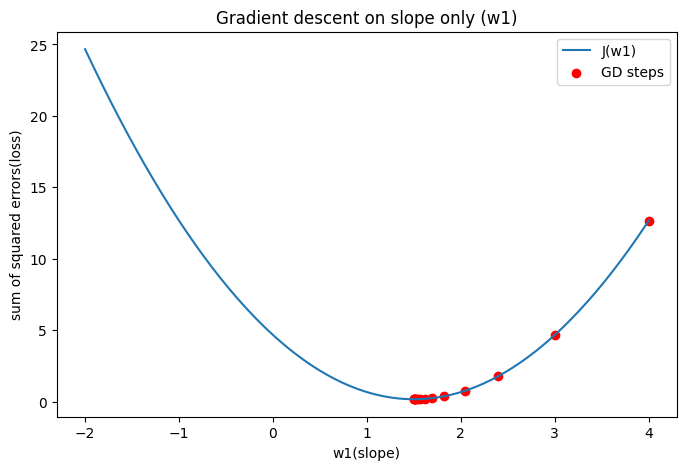

In [43]:
X = np.array([1, 2, 3])
y = np.array([2, 3, 5])
n = len(X)

def loss(w1):
    w0 = np.mean(y) - w1 * np.mean(X)
    y_pred = w1 * X + w0
    return np.sum((y - y_pred) ** 2)

def gradient(w1):
    w0 = np.mean(y) - w1 * np.mean(X)
    y_pred = w1 * X + w0
    return -2 * np.sum(X * (y - y_pred))

lr = 0.1
w1 = 4
iterations = 15

w1_values = []
loss_values = []

for i in range(iterations):
    w1_values.append(w1)
    loss_values.append(loss(w1))

    grad = gradient(w1)
    w1 = w1 - lr * grad

w_space = np.linspace(-2, 4, 200)
loss_space = [loss(w) for w in w_space]

plt.figure(figsize=(8, 5))
plt.plot(w_space, loss_space, label = "J(w1)")
plt.scatter(w1_values, loss_values, color="red", label="GD steps")
plt.xlabel("w1(slope)")
plt.ylabel("sum of squared errors(loss)")
plt.title("Gradient descent on slope only (w1)")
plt.legend()
plt.show()